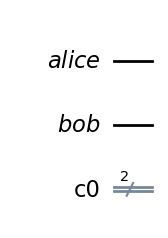

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qA = QuantumRegister(1,name='alice')
qB = QuantumRegister(1,name='bob')
c = ClassicalRegister(2)
qc = QuantumCircuit(qA,qB,c)
qc.draw('mpl')

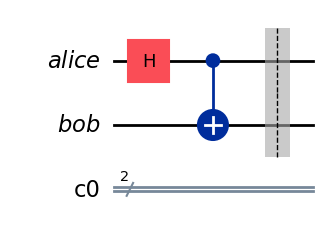

In [2]:
qc.h(qA[0])
qc.cx(qA[0],qB[0])
qc.barrier()
qc.draw('mpl')

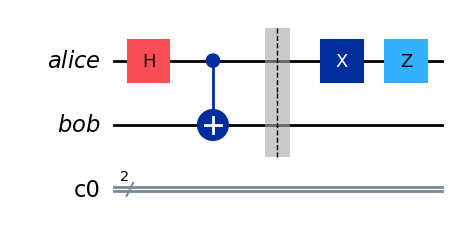

In [3]:
message = '11'
if message == '00':
    qc.i(qA[0])
elif message == '01':
    qc.x(qA[0])
elif message == '10':
    qc.z(qA[0])
elif message == '11':
    qc.x(qA[0])
    qc.z(qA[0])
qc.barrier
qc.draw('mpl')

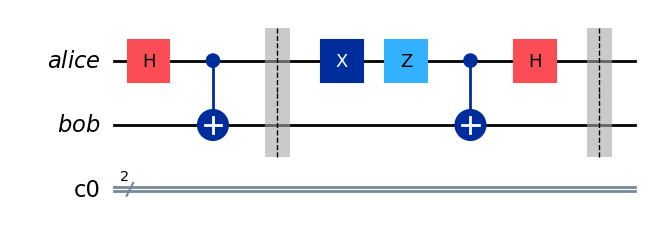

In [4]:
qc.cx(qA[0],qB[0])
qc.h(qA[0])
qc.barrier()
qc.draw('mpl')

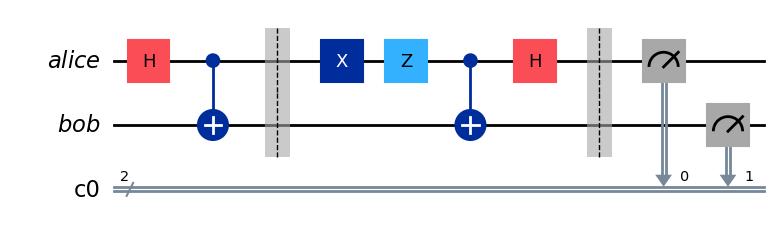

In [5]:
qc.measure(qA[0],c[0])
qc.measure(qB[0],c[1])
qc.draw('mpl')

In [6]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 1024}


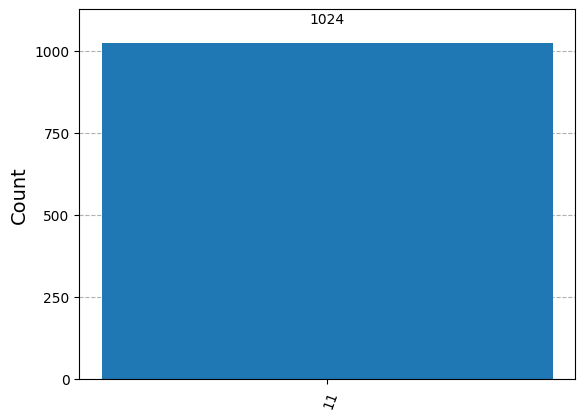

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [8]:
from qiskit_ibm_runtime.fake_provider import FakeBelemV2

In [9]:
device_simulator = FakeBelemV2()

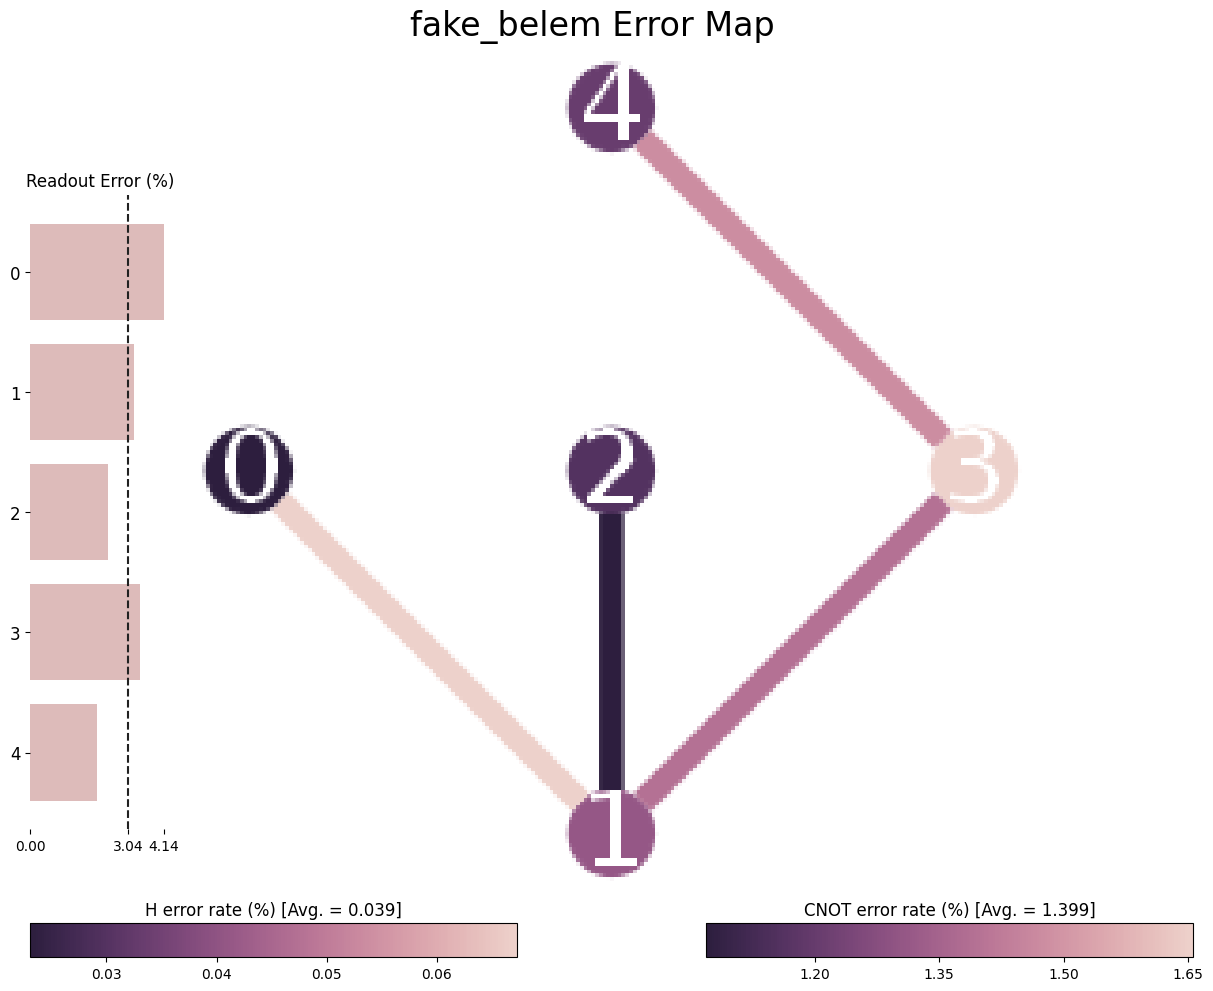

In [10]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)